In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/'Colab Notebooks'/kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

 97% 596M/612M [00:06<00:00, 116MB/s] 
100% 612M/612M [00:06<00:00, 105MB/s]


In [ ]:
! unzip gtsrb-german-traffic-sign.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [ ]:
!pip install tensorflow
!pip install tensorflow keras
!pip install tensorflow sklearn
!pip install tensorflow matplotlib
!pip install tensorflow pandas
!pip install tensorflow PIL


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=d5a62ec656041f1571d69efffb0eaf6925deae3ea7ca3071138c51ab6d4485b3
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distributio

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from PIL import Image

In [ ]:
import os

traffic_data = []
labels = []
classes = 43

cur_path = os.getcwd()

for i in range(classes):
  img_path = os.path.join(cur_path, 'train', str(i))
  images_img_path = os.listdir(img_path)
  for j in images_img_path:
    image = Image.open(img_path + '/' + j)
    image = image.resize((40, 40))
    image = np.array(image)
    traffic_data.append(image)
    labels.append(i)


In [ ]:
traffic_data = np.array(traffic_data)
labels = np.array(labels)

In [ ]:
print(traffic_data.shape)
print(labels.shape)

(39209, 40, 40, 3)
(39209,)


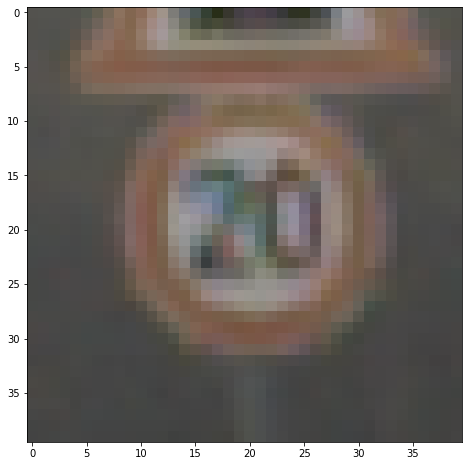

In [ ]:
plt.figure(figsize = (10, 8))
plt.imshow(traffic_data[1])

In [ ]:
from sklearn.model_selection import train_test_split 

train_X, test_X, train_y, test_y = train_test_split(traffic_data, labels, test_size = 0.3, random_state = 42)

In [ ]:
print(train_X.shape, test_X.shape)

(27446, 40, 40, 3) (11763, 40, 40, 3)


In [ ]:
from tensorflow.keras.utils import to_categorical 

train_y = to_categorical(train_y, 43)
test_y = to_categorical(test_y, 43)

In [ ]:
train_X, test_X = train_X / 255, test_X / 255

In [ ]:
train_X[0]

array([[[0.16470588, 0.15686275, 0.14901961],
        [0.18823529, 0.17647059, 0.16470588],
        [0.19215686, 0.16862745, 0.16078431],
        ...,
        [1.        , 1.        , 1.        ],
        [0.96862745, 1.        , 1.        ],
        [0.65098039, 0.84313725, 0.82352941]],

       [[0.14901961, 0.14509804, 0.14509804],
        [0.16470588, 0.15294118, 0.14901961],
        [0.18039216, 0.16078431, 0.16078431],
        ...,
        [1.        , 0.99215686, 0.98823529],
        [0.99215686, 1.        , 1.        ],
        [0.58823529, 0.71372549, 0.68235294]],

       [[0.14509804, 0.14117647, 0.14117647],
        [0.15294118, 0.14509804, 0.14509804],
        [0.16078431, 0.15294118, 0.14901961],
        ...,
        [0.95686275, 0.90588235, 0.91372549],
        [1.        , 1.        , 1.        ],
        [0.63921569, 0.7254902 , 0.71372549]],

       ...,

       [[0.16078431, 0.16078431, 0.16862745],
        [0.18039216, 0.18431373, 0.20392157],
        [0.18431373, 0

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
epochs = 100
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5), activation = 'relu', input_shape = train_X.shape[1:]))
model.add(Conv2D(filters = 32, kernel_size = (5,5), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.25))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.25))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(rate = 0.5))
model.add(Dense(43, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
fit_model = model.fit(train_X, train_y, batch_size = 32, epochs = epochs, validation_data = (test_X, test_y))


Epoch 1/100
858/858 [==============================] - 25s 15ms/step - loss: 1.3159 - accuracy: 0.6287 - val_loss: 0.1106 - val_accuracy: 0.9708
Epoch 2/100
858/858 [==============================] - 6s 7ms/step - loss: 0.2084 - accuracy: 0.9372 - val_loss: 0.0628 - val_accuracy: 0.9827
Epoch 3/100
858/858 [==============================] - 6s 7ms/step - loss: 0.1304 - accuracy: 0.9617 - val_loss: 0.0394 - val_accuracy: 0.9901
Epoch 4/100
858/858 [==============================] - 6s 7ms/step - loss: 0.0942 - accuracy: 0.9718 - val_loss: 0.0299 - val_accuracy: 0.9924
Epoch 5/100
858/858 [==============================] - 6s 7ms/step - loss: 0.0815 - accuracy: 0.9756 - val_loss: 0.0275 - val_accuracy: 0.9935
Epoch 6/100
858/858 [==============================] - 6s 7ms/step - loss: 0.0624 - accuracy: 0.9813 - val_loss: 0.0224 - val_accuracy: 0.9940
Epoch 7/100
858/858 [==============================] - 6s 8ms/step - loss: 0.0656 - accuracy: 0.9811 - val_loss: 0.0235 - val_accuracy: 0.99

In [ ]:
fit_model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
training_loss = fit_model.history['loss']
validation_loss = fit_model.history['val_loss'] 
training_accuracy = fit_model.history['accuracy'] 
validation_accuracy = fit_model.history['val_accuracy']


In [ ]:
!pip install plotly
import plotly.graph_objects as go
X = [i for i in range(epochs)]

fig = go.Figure()
fig.add_trace(go.Scatter(x = X, y = training_loss,
                    mode = 'lines',
                    name = 'Training loss'))
fig.add_trace(go.Scatter(x = X, y = validation_loss,
                    mode = 'lines',
                    name = 'Validation loss'))
fig.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = X, y = training_accuracy,
                    mode = 'lines',
                    name = 'Training accuracy'))
fig.add_trace(go.Scatter(x = X, y = validation_accuracy,
                    mode = 'lines',
                    name = 'Validation accuracy'))
fig.show()

In [ ]:
from sklearn.metrics import accuracy_score

test_data = pd.read_csv('Test.csv')


In [ ]:
test_data.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [ ]:
final_test_y = np.array(test_data['ClassId'].values)
final_test_X = []
data = test_data['Path'].values 
for image in data:
  data = Image.open(image)
  data = data.resize((40, 40))
  final_test_X.append(np.array(data))
final_test_X = (np.array(final_test_X)) / 255

In [ ]:
final_test_X.shape

(12630, 40, 40, 3)

In [ ]:
final_pred_y = model.predict(final_test_X)

395/395 [==============================] - 1s 3ms/step


In [ ]:
final_pred_y = [np.argmax(i) for i in final_pred_y]

In [ ]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix
print(confusion_matrix(final_pred_y, final_test_y))

[[ 60   0   0 ...   0   0   0]
 [  0 714   2 ...   1   0   0]
 [  0   0 748 ...   0   0   0]
 ...
 [  0   1   0 ...  76   0   0]
 [  0   0   0 ...   0  52   1]
 [  0   0   0 ...   0   0  89]]


In [ ]:
print(accuracy_score(final_pred_y, final_test_y))

0.9813143309580364


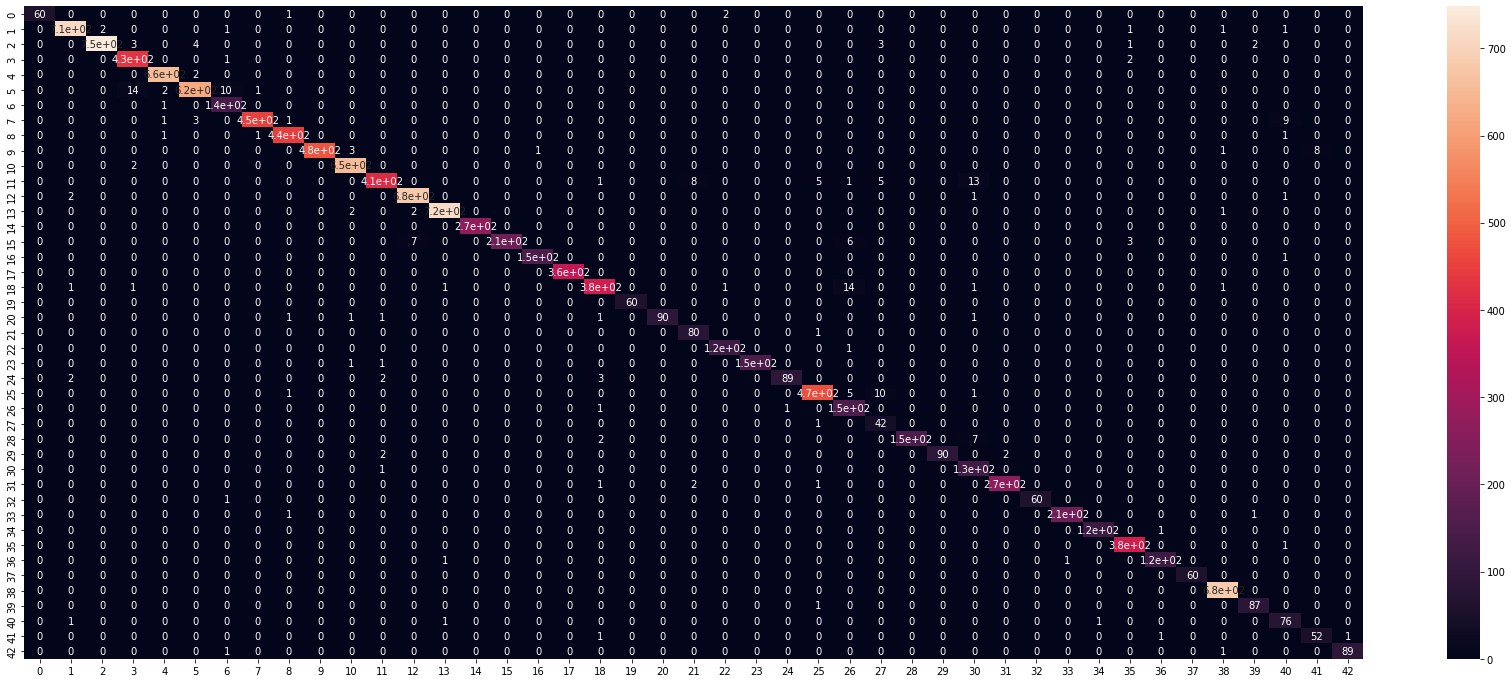

In [ ]:
import seaborn as sns
plt.figure(figsize = (30, 12))
sns.heatmap(confusion_matrix(final_pred_y, final_test_y), annot = True)

In [ ]:
model.save('traffic_classifier.h5')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 989 kB 37.0 MB/s 


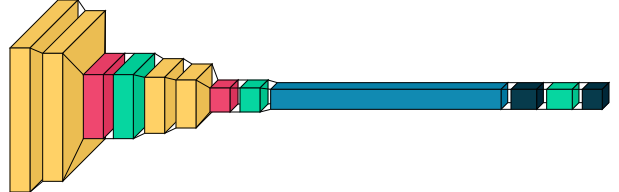

In [ ]:
!pip install visualkeras
import visualkeras 

visualkeras.layered_view(model)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 36, 36, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        36928     
                                                        